In [0]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as mplot
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)



In [0]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_test = to_categorical(y_test, num_classes=10)
y_train = to_categorical(y_train, num_classes=10)

In [0]:
input_shape = (28,28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [0]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2)

In [20]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=[early_stop], validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4948 - accuracy: 0.8199 - val_loss: 0.3878 - val_accuracy: 0.8637
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3213 - accuracy: 0.8825 - val_loss: 0.3161 - val_accuracy: 0.8844
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2771 - accuracy: 0.8973 - val_loss: 0.2871 - val_accuracy: 0.8989
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2469 - accuracy: 0.9094 - val_loss: 0.2656 - val_accuracy: 0.8997
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2247 - accuracy: 0.9178 - val_loss: 0.2620 - val_accuracy: 0.9065
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2037 - accuracy: 0.9242 - val_loss: 0.2638 - val_accuracy: 0.9054
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1877 - accuracy: 0.9300 - val_loss: 0.2635 - val_accuracy:

       loss  accuracy  val_loss  val_accuracy
0  0.494784  0.819883  0.387813        0.8637
1  0.321305  0.882500  0.316116        0.8844
2  0.277139  0.897333  0.287115        0.8989
3  0.246882  0.909450  0.265616        0.8997
4  0.224722  0.917817  0.261980        0.9065
5  0.203652  0.924217  0.263819        0.9054
6  0.187721  0.929983  0.263471        0.9087
7  0.175025  0.933683  0.268061        0.9067
8  0.161405  0.939283  0.279521        0.9080


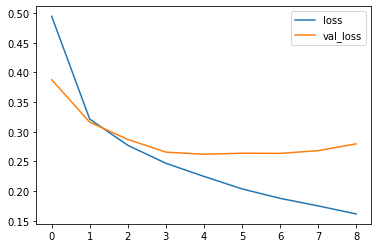

In [23]:
history = pd.DataFrame(model.history.history)
print(history)
loss = history[['loss', 'val_loss']]
accuracy = history[['accuracy', 'val_accuracy']]
loss_plot = loss.plot()


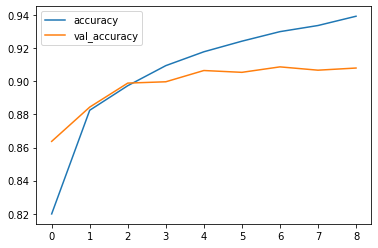

In [24]:
accuracy_plot = accuracy.plot()

In [0]:
predictions = model.predict_classes(X_test, batch_size=8)

In [39]:
test_metrics = model.evaluate(X_test, y_test, batch_size=64)

157/157 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.9080


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_test = np.argmax(y_test, axis=1)

In [0]:
class_report = classification_report(y_test, predictions)

In [0]:
conf_mat = confusion_matrix(y_test, predictions)

In [48]:
conf_mat

array([[822,   1,  20,  23,   3,   1, 125,   0,   5,   0],
       [  0, 982,   1,  13,   2,   0,   1,   0,   1,   0],
       [  8,   1, 817,  12,  87,   0,  74,   0,   1,   0],
       [  5,   7,   9, 911,  36,   0,  30,   0,   1,   1],
       [  0,   0,  19,  16, 896,   0,  69,   0,   0,   0],
       [  0,   0,   0,   1,   0, 972,   0,  15,   1,  11],
       [ 84,   1,  44,  21,  59,   0, 781,   0,  10,   0],
       [  0,   0,   0,   0,   0,  12,   0, 965,   0,  23],
       [  1,   1,   3,   6,   8,   1,   6,   4, 970,   0],
       [  0,   0,   1,   0,   0,   3,   0,  32,   0, 964]])

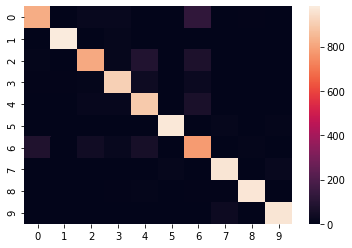

In [51]:
conf_heat = sns.heatmap(conf_mat)

In [50]:
conf_mat

array([[822,   1,  20,  23,   3,   1, 125,   0,   5,   0],
       [  0, 982,   1,  13,   2,   0,   1,   0,   1,   0],
       [  8,   1, 817,  12,  87,   0,  74,   0,   1,   0],
       [  5,   7,   9, 911,  36,   0,  30,   0,   1,   1],
       [  0,   0,  19,  16, 896,   0,  69,   0,   0,   0],
       [  0,   0,   0,   1,   0, 972,   0,  15,   1,  11],
       [ 84,   1,  44,  21,  59,   0, 781,   0,  10,   0],
       [  0,   0,   0,   0,   0,  12,   0, 965,   0,  23],
       [  1,   1,   3,   6,   8,   1,   6,   4, 970,   0],
       [  0,   0,   1,   0,   0,   3,   0,  32,   0, 964]])

In [52]:
model.save('mnist_fashion')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_fashion/assets


In [66]:
mapping_dict = {0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}
mapping_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

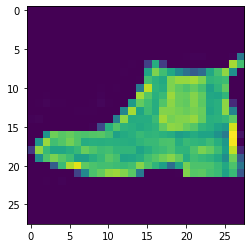

In [107]:
#Generate a  random image
num = np.random.randint(0, 10000)
pred_img = X_train[num]
pred_img = pred_img.reshape(28,28)
mplot.imshow(pred_img)

In [108]:
#Predict the random image
pred_img = pred_img.reshape(1,28,28,1)
result = model.predict_classes(pred_img)
print(mapping_dict[result[0]])

Ankle boot
